In [1]:
# Task: predict dropout/graduate/enrollment

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

In [3]:
df = pd.read_csv('datasets/student.csv', sep=';')

In [4]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
# Encode Target to int
le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [7]:
# Split data
fs = SelectKBest(score_func=f_classif, k=15)

x = fs.fit_transform(df.values[:,:-1], df.values[:,-1])
y = df.values[:,-1]
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

In [8]:
# Set baseline
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train, y_train)
accuracy = dummy.score(x_test, y_test)
print(f"Baseline Acc: {accuracy:.3f}")

Baseline Acc: 0.519


In [9]:
# Linear 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Non-Linear
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

from sklearn.model_selection import KFold, cross_val_score

In [10]:
# Spot-check algorithm
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SGD', SGDClassifier()))


In [11]:
names, results = [], []
n_folds = 10
scoring = 'accuracy'
for name, model in models:
  cv = KFold(n_splits=n_folds)
  cv_results = cross_val_score(model, x_train, y_train, cv=cv, scoring=scoring)
  
  results.append(cv_results)
  names.append(name)
  print(f"{name}: {cv_results.mean():.3f}")

/usr/local/var/pyenv/versions/3.10.2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/var/pyenv/versions/3.10.2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

LR: 0.760
LDA: 0.752
KNN: 0.667
NB: 0.713
DT: 0.685
SGD: 0.672


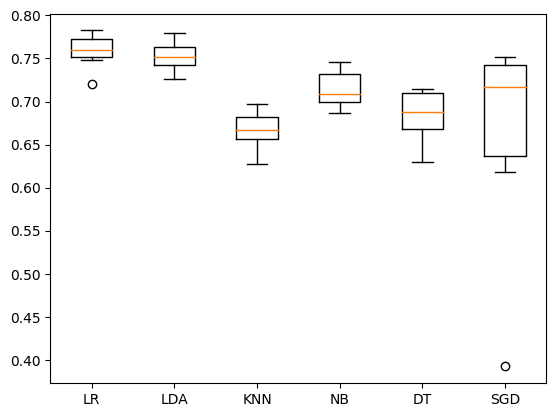

In [12]:
# Compare the algorithm
fig = plt.figure()
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names);

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
# Eval on Standardize Data
pipelines = []

pipelines.append(
  ('ScaledLR', Pipeline([
    ('Scalar', StandardScaler()),
    ('LR', LogisticRegression(max_iter=1000))
  ]))
)

pipelines.append(
  ('ScaledLDA', Pipeline([
    ('Scalar', StandardScaler()),
    ('LDA', LinearDiscriminantAnalysis())
  ]))
)

pipelines.append(
  ('ScaledKNN', Pipeline([
    ('Scalar', StandardScaler()),
    ('KNN', KNeighborsClassifier())
  ]))
)

pipelines.append(
  ('ScaledDT', Pipeline([
    ('Scalar', StandardScaler()),
    ('KNN', DecisionTreeClassifier())
  ]))
)

pipelines.append(
  ('ScaledNB', Pipeline([
    ('Scalar', StandardScaler()),
    ('NB', GaussianNB())
  ]))
)

pipelines.append(
  ('ScaledSGD', Pipeline([
    ('Scalar', StandardScaler()),
    ('SGD', SGDClassifier(learning_rate='adaptive', eta0=0.01))
  ]))
)

In [15]:
names, results = [], []
n_folds = 10
scoring = 'accuracy'
for name, model in pipelines:
  cv = KFold(n_splits=n_folds)
  cv_results = cross_val_score(model, x_train, y_train, cv=cv, scoring=scoring)
  
  results.append(cv_results)
  names.append(name)
  print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

ScaledLR: 0.760 (0.018)
ScaledLDA: 0.752 (0.015)
ScaledKNN: 0.730 (0.016)
ScaledDT: 0.683 (0.028)
ScaledNB: 0.713 (0.020)
ScaledSGD: 0.746 (0.024)


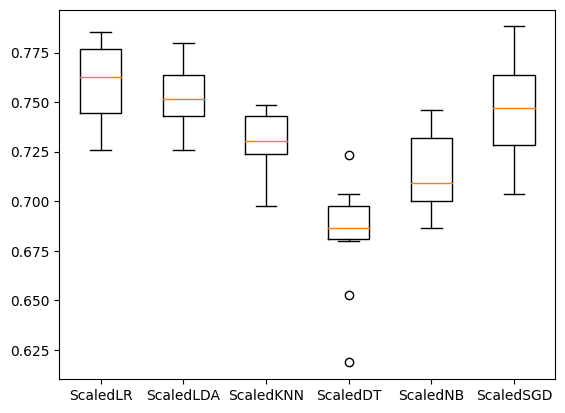

In [16]:
# Compare the algorithm after scaling the data
fig = plt.figure()
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names);

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
# Tuning LR
scalar = StandardScaler().fit(x_train)
scaled_x = scalar.transform(x_train)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.3, 2.5, 3, 10, 100]}
model = LogisticRegression(max_iter=1000)
kfold = KFold(n_splits=n_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, error_score='raise')
grid_result = grid.fit(scaled_x, y_train)
print(f"Best: {grid_result.best_score_}, {grid_result.best_params_}")

Best: 0.7609550180199618, {'C': 100}


In [19]:
# Tuning LDA
scalar = StandardScaler().fit(x_train)
scaled_x = scalar.transform(x_train)
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
}
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=n_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, error_score='raise')
grid_result = grid.fit(scaled_x, y_train)
print(f"Best: {grid_result.best_score_}, {grid_result.best_params_}")

Best: 0.7496479914335259, {'solver': 'svd'}


In [20]:
from sklearn.ensemble import (
  AdaBoostClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier,
  RandomForestClassifier, ExtraTreesClassifier
)

In [21]:
# Try emsemble methods
ensembles = []
# boosting
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GDM', GradientBoostingClassifier()))
ensembles.append(('HGB', HistGradientBoostingClassifier()))

# bagging
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

In [22]:
names, results = [], []
n_folds = 10
scoring = 'accuracy'
for name, model in ensembles:
  cv = KFold(n_splits=n_folds)
  cv_results = cross_val_score(model, x_train, y_train, cv=cv, scoring=scoring)
  
  results.append(cv_results)
  names.append(name)
  print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

AB: 0.748 (0.020)
GDM: 0.765 (0.021)
HGB: 0.756 (0.020)
RF: 0.764 (0.020)
ET: 0.757 (0.016)


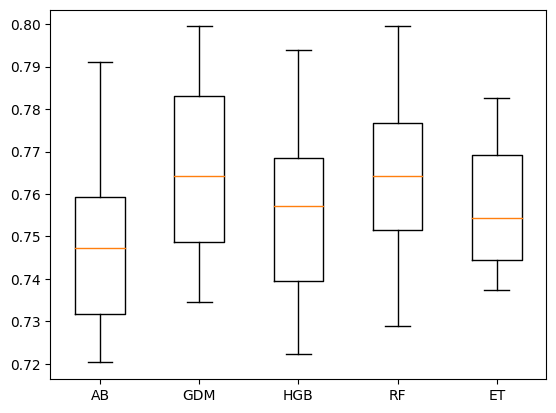

In [23]:
fig = plt.figure()
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names);

In [24]:
# Eval on Standardize Data
pipelines = []

pipelines.append(
  ('ScaledAB', Pipeline([
    ('Scalar', StandardScaler()),
    ('AB', AdaBoostClassifier())
  ]))
)

pipelines.append(
  ('ScaledGDM', Pipeline([
    ('Scalar', StandardScaler()),
    ('GDM', GradientBoostingClassifier())
  ]))
)

pipelines.append(
  ('ScaledHGB', Pipeline([
    ('Scalar', StandardScaler()),
    ('HGB', HistGradientBoostingClassifier())
  ]))
)

pipelines.append(
  ('ScaledRF', Pipeline([
    ('Scalar', StandardScaler()),
    ('RF', RandomForestClassifier())
  ]))
)

pipelines.append(
  ('ScaledET', Pipeline([
    ('Scalar', StandardScaler()),
    ('ET', ExtraTreesClassifier(n_estimators=200))
  ]))
)

In [25]:
names, results = [], []
n_folds = 10
scoring = 'accuracy'
for name, model in pipelines:
  cv = KFold(n_splits=n_folds)
  cv_results = cross_val_score(model, x_train, y_train, cv=cv, scoring=scoring)
  
  results.append(cv_results)
  names.append(name)
  print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

ScaledAB: 0.748 (0.021)
ScaledGDM: 0.764 (0.021)
ScaledHGB: 0.756 (0.020)
ScaledRF: 0.762 (0.014)
ScaledET: 0.755 (0.012)


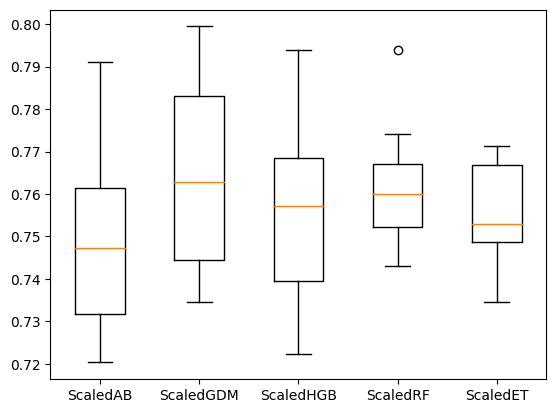

In [26]:
fig = plt.figure()
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names);

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
scalar = StandardScaler().fit(x_train)
scaled_x = scalar.transform(x_train)

param_grid = {
    'learning_rate': np.logspace(-4, 0, 100)
}

model = HistGradientBoostingClassifier()
kfold = KFold(n_splits=n_folds)
random_search = RandomizedSearchCV(
  model, param_distributions=param_grid, 
  n_iter=100, cv=kfold, n_jobs=-1
)

#grid = GridSearchCV(estimator=model, param_grid=param_grid, error_score='raise')
#grid_result = grid.fit(scaled_x, y_train)

random_search.fit(scaled_x, y_train)
print(f"Best: {random_search.best_score_}, {random_search.best_params_}")

Best: 0.7637745874745921, {'learning_rate': 0.022051307399030457}


In [29]:
# Tuning LDA
scalar = StandardScaler().fit(x_train)
scaled_x = scalar.transform(x_train)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4]
}
model = RandomForestClassifier()
kfold = KFold(n_splits=n_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, error_score='raise')
grid_result = grid.fit(scaled_x, y_train)
print(f"Best: {grid_result.best_score_}, {grid_result.best_params_}")

Best: 0.7651939043783313, {'max_depth': 10, 'n_estimators': 200}


In [30]:
from sklearn.metrics import classification_report

In [35]:
# Finalize Model
scalar = StandardScaler().fit(x_train)
scaled_x = scalar.transform(x_train)
model = HistGradientBoostingClassifier(learning_rate=0.022051307399030457)
model.fit(scaled_x, y_train)

scaled_x_test = scalar.transform(x_test)
pred = model.predict(scaled_x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78       277
         1.0       0.50      0.40      0.44       149
         2.0       0.83      0.92      0.87       459

    accuracy                           0.78       885
   macro avg       0.71      0.69      0.70       885
weighted avg       0.77      0.78      0.77       885

